In [4]:
#Aglomerativo
#Segmentación de Clientes Mayoristas

#Librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Libreria para la normalización de datos
from sklearn.preprocessing import normalize
# Libreria para el dendograma
from scipy.cluster.hierarchy import dendrogram, linkage
# Libreria para el cluster Aglomerativo
from sklearn.cluster import AgglomerativeClustering

In [5]:
#Cargue de los datos
data = pd.read_csv('data_set/wholesale_customer.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
#Normalización de datos para que no esten tan dispersos
##### INSERTE SU CÓDIGO AQUÍ #####
# Se normalizan los datos

datos_normalizados = normalize(data)
datos_normalizados = pd.DataFrame(datos_normalizados, columns= data.columns)

datos_normalizados.head()



##### FIN CÓDIGO INSERTADO #####

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


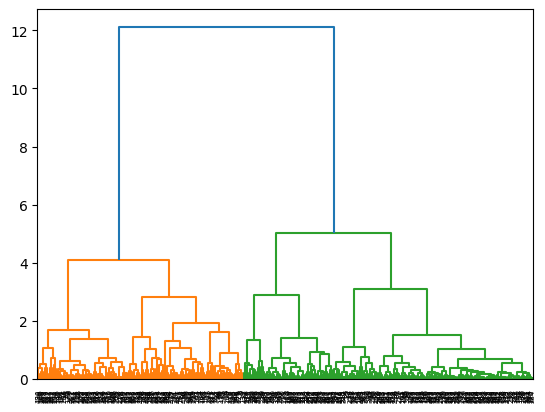

In [7]:
#Dendograma
##### INSERTE SU CÓDIGO AQUÍ #####
# Gráfica Dendograma con método 'ward'
dendograma = dendrogram(linkage(datos_normalizados, method='ward', metric='euclidean'))
##### FIN CÓDIGO INSERTADO #####

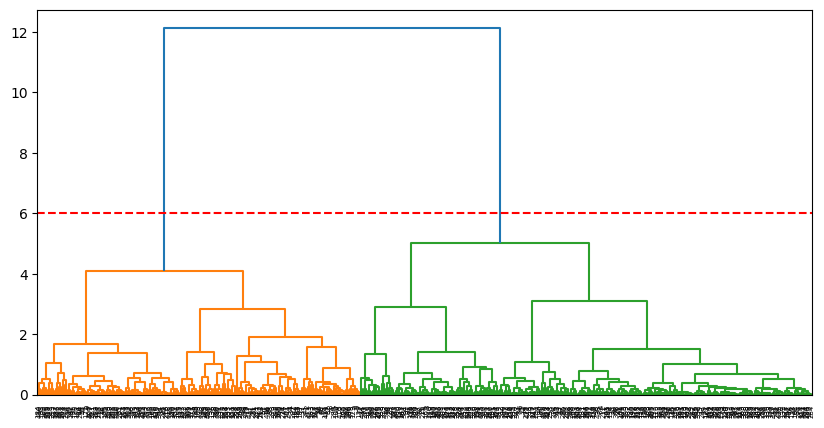

In [16]:
# Gráfica Dendograma con método 'ward'
# Plot the dendrogram 
plt.figure(figsize=(10, 5))
dendrogram(linkage(datos_normalizados, method='ward', metric='euclidean'), color_threshold=6)
plt.axhline(y=6, color='red', linestyle='--')
plt.show()
##### FIN CÓDIGO INSERTADO #####

In [24]:
##### INSERTE SU CÓDIGO AQUÍ #####
# Cluster Aglomerativo con: 2 clusters, afinidad euclidiana y enlace ward

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

a = ac.fit_predict(datos_normalizados)

labels = ac.labels_

labels


##### FIN CÓDIGO INSERTADO #####

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

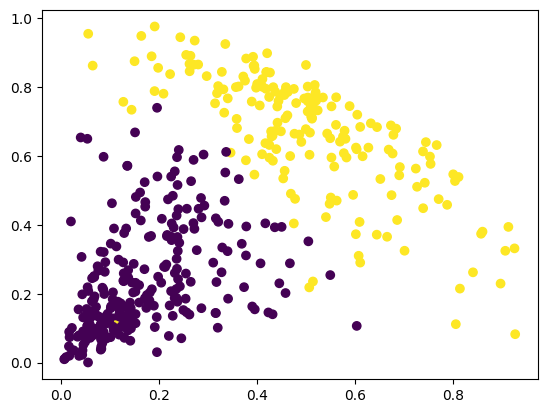

In [25]:
#Visualización de los grupos
##### INSERTE SU CÓDIGO AQUÍ #####
# Visualización de los grupos: 'Milk' eje X y 'Grocery' eje Y

#Gráfica de las Categorías
plt.scatter(datos_normalizados['Milk'], datos_normalizados['Grocery'],  c = a)
plt.show()


##### FIN CÓDIGO INSERTADO #####